# Project: CPPI Portfolios Simulations Under Different Risky Assets

**By: Victor Felipe Gontijo - Quantitative research intern - BNP Paribas - Paris**

**Proposed by: Jean-Philippe Lemor - Head of systematic strategies and hybrids quantitative research team - BNP Paribas - Paris**

**June 2020**

## Constant Proportion Portfolio Insurance - CPPI

We develop here an implementation of some ideas presented in the paper: 

*Bertrand, Philippe and Prigent, Jean-Luc, Portfolio Insurance Strategies: OBPI Versus CPPI (December 1, 2001)*

Particularly, we intend to analyze, the value of a CPPI portfolio over time, as a stochastic process. 

In this project, we first try to elucidate the main theoretical ideas contained in the article, and, in a second moment, we develop Python simulations to explore these ideas and investigate their potential. 

## Introduction

In the context of our analysis, we consider two assets: a risky asset and a riskless one. We want, therefore, to build a portfolio composed of these two assets. More than this, we want to build a portfolio insurance strategy that, with regard to the risky asset, allows one to profit from a bullish market and also have protection against downward moves.

Note that the risky asset can be a single asset or even an index, composed of multiple risky assets.

The CPPI strategy consists in dynamically choosing a proper exposition to each asset, determining therefore a dynamic portfolio. This strategy is based on well-defined rules that determine, in each rebalancing time, the exposition one should assign to each one of the two assets. 

As we will see, such CPPI allocations between the risky and the riskless asset are dependent on the paths followed by both assets. As the risky asset's returns are presumably a stochastic process, so are the CPPI allocations and the value of the CPPI portfolio over time. 

In this project, we make reasonable assumptions concerning the returns of both assets. We intend to determine, in function of these assumptions, the value of a CPPI portfolio over time, regarded always as a stochastic process. In a second time, we also perform simulations that help us to test the potential of that theoretical approach and also gain some insight into the path-dependency of such a CPPI portfolio. 

With this, we aim to investigate the properties of a CPPI strategy under different risk aversions, different rebalancing times, and also different assumptions concerning the movement of the risky asset. 

## A portfolio with two assets

### The *riskless asset*

Let $B_t$ be the value of a given position on the riskless asset, at some instant $t$. The dynamics of the riskless asset's returns are supposed to follow:

\begin{equation*}
\ \it{dB_t} = B_tr \it{dt}
\label{eq:riskless_dynamics} \tag{1}
\end{equation*}

where $r$ is the risk-free rate.

### The *risky asset*

Let $S_t$ be the value of a given position on the risky asset, at some instant $t$. We use the quite satisfactory assumption that the returns of the risky asset follow a diffusion process:

\begin{equation*}
\ \it{dS_t} = \mu_t S_t\it{dt} + \sigma_t S_t\it{dW_t^S}
\label{eq:risky_dynamics} \tag{2.0}
\end{equation*}

We also consider models with stochastic volatility. In this case, the dynamics of $\sigma_t$ are described by:

\begin{equation*}
\ \it{d\sigma_t} =  a(t,\sigma_t) \sigma_t\it{dt} + b(t,\sigma_t) \sigma_t\it{d}W_t^{\sigma}
\label{eq:vol_dynamics} \tag{2.1}
\end{equation*}

where $W_t^S$ and $W_t^{\sigma}$ are different Brownian motions. 

We also make the following assumptions: Functions $\mu$, $a$ and $b$ are assumed to satisfy usual conditions (Lipschitz and linear growth) such that the system of the two stochastic differential equations has one and only one solution.

**Note**: So far, all processes have been expressed in the form of differential equations. Even though such description provides some reasonable insights about the related processes, sometimes such equations are only precisely defined in a larger context. One should note, for example, that the stochastic differential equations used to describe the risky asset only have a mathematical sense when regarded as integral equations:

$\it{dS_t} = \mu_t S_t\it{dt} + \sigma_t S_t\it{dW_t^S}$ means $S$ is a stochastic process that satifies : $S_{t+u} - S_t = \int_t^{t+u}S_v\mu_v\it{dv} + \int_t^{t+u}S_v\sigma_v\it{dW_v}$ over some considered domain.

For the integrals to be well-defined, the processes $S_t\mu_t$ and $S_t\sigma_t$ are supposed to be progressive measurable under the filtration generated by the Brownian Motion. Under these reasonable assumptions, the first integral is a Lebesgue's Integral with respect to the Lebesgue measure over the Borel-sets of $\mathbb{R}$ and the second integral is an Itô's Integral with respect to the Brownian Motion. 

The same is true for the equation describing the stochastic volatility. Such notations are common in the language of the Stochastic Calculus and cause no troubles, once one knows the mathematical concepts being treated.  

## The CPPI strategy

### The *floor*

Let us discuss the dynamics of an important parameter of the model: the *floor*, whose value at the instant $t$ is represented by $F_t$. 

When one sets a CPPI portfolio at the instant $t=0$, one also defines a time horizon $T$ for the portfolio. The *floor* is designed to act like a barrier that changes over time. If the model behaves as expected, the value of the portfolio should never be below the *floor*, in any given instant of time, during the whole duration [0,T].

 Additionally, one chooses a minimal value $F_T$ he wants to assure for his portfolio, at the date $t=T$. Therefore, if the model behaves as expected, at $t=T$, the investor can be sure he will receive, at least, a part of his initial investments, corresponding to $F_T$.

At $t=0$, the present value of $F_T = F_t exp(-rT)$ is required to be less than the initial value $V_0$ one disposes for building the portfolio.

$F_0 := F_T exp(-rT)$ with the condition that $F_0 < V_0$ . 

The dynamics of the *floor* are the same of those from the *riskless asset*, which in this project we consider being:

\begin{equation*}
\ \it{dF_t} = F_tr \it{dt}
\label{eq:floor_dynamics} \tag{3}
\end{equation*}

### The *cushion*

We have discussed the existence of a parameter name *floor* in the model. Indeed, this parameter is used to define another important parameter named *cushion*, which we represent by $C$.

Let $V_t$ be the value of the CPPI portfolio in a instant $t$. $C_t$ is defined as follows:

\begin{equation*}
\ C_t := V_t - F_t
\label{eq:cushion_def} \tag{4}
\end{equation*}

As $V$ is a stochastic process, so is $C$. Intuitively, the *cushion* indicates, in any instant $t$ how the portfolio value is above the *floor*. We should remember the *floor* is designed to be a lower barrier that assures at $t=T$ the minimum required value of $F_T$ .

### Rebalancing the portfolio - Determining the expositions to the *risky* and the *riskless asset*

Up to now, we have developed some hypotheses to describe the evolution of the *risky* and the *riskless* asset. We have also defined two parameters named *floor* and *cushion*. However, neither we have mentioned how to compose a CPPI portfolio with the considered assets, nor how these two parameters could help on it. In fact, a CPPI portfolio does not depend at all on the models used for describing the evolution of the assets, it just takes their current and historical prices in consideration.

A CPPI portfolio is dynamically rebalanced. The process of rebalancing a CPPI portfolio is done at $n$ different rebalancing dates $t_1, ..., t_n \in [0,T]$, according to some specified rules. To benefit from the powerful tools of the Differential Calculus and Differential Equations we can ideally consider CPPI portfolios continuously rebalanced over $t\in [0,T]$.

Let $t$ be a rebalancing instant, the exposition one assigns to the *risky asset* is represented by $e_t$. What defines the CPPI strategy is basically how we determine $e_t$. 

For this, let $m$ be a pre-chosen constant parameter. Usually $m>1$ and it is chosen in accordance with the risk-tolerance of the investor. Once $m$ is defined before setting the portfolio, we have, for every rebalancing intant t, the following relation determining $e_t$:

\begin{equation*}
\ e_t = m C_t 
\label{eq:exposition_risky_def} \tag{5.0}
\end{equation*}

Let $l_t$ be the exposition one assigns to the to the *riskless asset*, at rhe rebalancing instant $t$. Once we determine $e_t$, the exposition to the *riskless asset* will be accordingly chosen to match the current portfolio value:

\begin{equation*}
\ l_t = V_t - e_t
\label{eq:exposition_riskless_def} \tag{5.1}
\end{equation*}

Those relations mean that, in each rebalancing instant, the CPPI portfolio has a value, and new positions on both assets will be taken, such that the remaining value of the portfolio remains the same. We have, thus, a self-financing portfolio.

As we have mentioned, the CPPI strategy is completely determined by the choice of the exposition $e$ to the *risky asset*.

### Analysis of the portfolio value

Let $V_0$ be the initial value an investor disposes of for building the CPPI portfolio.

$V_0 > F_0 \Rightarrow C_0 > 0 \Rightarrow e_0 > 0$

Hence, the CPPI portfolio always starts with a long position on the *risky asset*. If $e_0 \leq V_0$ one has an initial long position on the *riskless asset*, else, one starts the CPPI portfolio with a short position on the *riskless asset*.

With all assumptions concerning the assets' evolution, one should note the paths of $V$ must be continuous (almost surely). Indeed, if there were no reallocations, a path of $V$ would be just a linear combination of the paths followed by $B$ and $S$. As such paths are continuous (a.s), we would have the same property for the path of $V$. Well, the CPPI strategy was defined in a such way that we have a self-financing portfolio, which implies the paths of $V$ remain continuous with the considered rebalancings.

For all the theoretical approach we develop in sequence, we only consider **CPPI portfolios continuously rebalanced** over time: 

Indeed, for this case, one should note that $V$ never descends below $F$.

**Proof**:

Let us suppose the opposite: there is some $t^{**} \in [0,T]$ such that: $V_{t^{**}} < F_{t^{**}}$.

$V_0 > F_0$ and $V$, $F$ are continuous $\Rightarrow$ there is some $t^* \in (0,t^{**})$ such that: $V_{t^*} - F_{t^*} = 0$ 

$\Rightarrow C_{t^*} = 0 \Rightarrow e_{t^*} = 0 \Rightarrow l_{t^*} = V_{t^*} = F_{t^*}$

From the dynamics of $C$ and $F$, we know: for every $t \in [t^*,T]$ , $C_t = 0$ and $V_t = F_t$. Which particularly contradicts the first hypothesis. 

**QED**

**Note**:
Besides showing that $V$ never descends below $F$, this proof also tells us a very important property about CPPI portfolios: If the value of the portfolio is equal the value of the *floor* at a particular instant, they will have always the same value, from that moment on, until the end of the investment period. It is known as *cash-in risk*, once from that moment on, all the portfolio is fully invested on the *riskless asset* and the portfolio can no longer profit from upward movements of the *risky asset*.

It also shows $C \geq 0$ which implies: in a CPPI portfolio, one has either a null or a long position on the *risky asset*. The position on the *riskless asset* can be both long or short.

## A formula for the *portfolio value* as a function of m and the *risky asset* current price

### The *cushion's* dynamics

Let $t \in [0,T]$: $V_t$ is given through the following stochastic integrals:

\begin{equation*}
\ V_t = V_0 + \int_0^t \frac{l_u}{B_u}\it{dB_u} + \int_0^t \frac{e_u}{S_u}\it{dS_u} 
\label{portfolio_value_integral} \tag{6.0}
\end{equation*}

Note $e_u = m C_u$ and $l_u = V_u - e_u = C_u + F_u - mC_u$. 

It allows us to rewrite the last equation as:

$$ V_t - V_0 = \int_0^t \frac{C_u - mC_u}{B_u}\it{dB_u} + \int_0^t \frac{F_u}{B_u}\it{dB_u} + \int_0^t m\frac{C_u}{S_u}\it{dS_u} $$

Note $ \int_0^t \frac{F_u}{B_u}\it{dB_u} =  \int_0^t F_ur\it{du} = \int_0^t \it{dB_u} = F_t - F_0 $

Hence, we have:

$$ (V_t + F_t) - (V_0 - F_0) = \int_0^t \frac{C_u - mC_u}{B_u}\it{dB_u} + \int_0^t m\frac{C_u}{S_u}\it{dS_u} $$

Note $ (V_t + F_t) - (V_0 - F_0) = C_t - C_0 $

We get, therefore, the equality:

\begin{equation*}
\ C_t = C_0 + \int_0^t \frac{C_u - mC_u}{B_u}\it{dB_u} + \int_0^t m\frac{C_u}{S_u}\it{dS_u} 
\label{cushion_integral} \tag{6.1}
\end{equation*}

Which can also be written in the differencial form:

$$ \it{dC_t} = \frac{C_t - mC_t}{B}\it{dB_t} +  m\frac{C_t}{S_t}\it{dS_t} $$

With a change of variables we can rewrite the equation as:

\begin{equation*}
\ \it{dC_t} = C_t[(m(\mu_t - r) + r) \it{dt} +  m\sigma_t\it{dW_t}] 
\label{cushion_diff} \tag{6.2}
\end{equation*}

### A formula for the *cushion* 

We look now at the process $log(C)$, which, by the Itô's Lemma is a solution of the equation:

$$ \it{d}log(C_t) = \frac{1}{C_t} \it{dC_t} - \frac{1}{2C_t^2} \it{d[C]_t} $$ where $[C]_t$ is the quadratic variation of the process $C$, acummulated from $0$ to $t$.

Let $Z$ be a stochastic process such that: $Z_0 = 0$ and $\it{dZ_t} = (m(\mu_t - r) + r) \it{dt} +  m\sigma_t\it{dW_t}$. 

We note $Z$ is an Itô's drift-diffusion process and satisfies: $\it{dC_t} = C_t \it{dZ_t}$

Using the defintion of $Z$, we can write:
$$\it{d}log(C_t) = \it{dZ_t} - \frac{1}{2} \it{d[Z]_t}$$

Which, after being integrated and then exponentiated, gives:

$$ C_t = C_0 exp( Z_t - \frac{1}{2}[Z]_t)$$

Once $Z$ is an Itô's process, $ [Z]_t = \int_0^t (m\sigma_u)^2\it{du} = m^2\int_0^t \sigma_u^2\it{du} $

Hence,

\begin{equation*}
\ C_t = C_0 exp[ rt(1-m) + m\int_0^t(\mu_u - \frac{1}{2}m\sigma_u^2) \it{du} +  m\int_0^t\sigma_u \it{dW_u} ] 
\label{cushion_final_integral} \tag{7}
\end{equation*}

### A formula for the *cushion* in function of m and the *risky asset* current price

From the dynamics of the *risky asset*, we have: 

$$ S_t = S_0 exp[ \int_0^t\sigma_u \it{dW_u} + \int_0^t(\mu_u - \frac{1}{2}\sigma_u^2) \it{du}]$$

We can take the $m$-powers of both sides and deduce the relation:
$$ exp[m\int_0^t\sigma_u \it{dW_u}] =  \frac{S_t^m}{S_0^m} exp[ -m\int_0^t(\mu_u - \frac{1}{2}\sigma_u^2) \it{du}]$$

Using equation (7) for $C_t$, we finally get to a formula that expresses the *cushion* at any instant $t$, as a function of $m$ and $S_t$:

\begin{equation*}
\ C_t = C_0 (\frac{S_t}{S_0})^m exp[ rt(1-m) + \frac{1}{2}(m-m^2)\int_0^t\sigma_u^2\it{du}]
\label{cushion_final2_integral} \tag{8.0}
\end{equation*}

To benefit from a clear visualization, we define two processes $\alpha$ and $\beta$:

\begin{equation*}
\ \beta_t := r(1-m) + \frac{1}{2}(m-m^2)\frac{1}{t}\int_0^t\sigma_u^2\it{du}
\label{beta_def} \tag{8.1}
\end{equation*}

Note $\int_0^t\sigma_u^2\it{du}$ is a sort of "mean" of the stochastic volatility over $[0,t]$ and, for $m>1$, $\beta < 0$. 

\begin{equation*}
\ \alpha_t := \frac{C_0}{S_0^m} exp[\beta_tt]
\label{alpha_def} \tag{8.2}
\end{equation*}

Note, for $m>1$, $\alpha_t$ is a sort of exponential decay.

We can, therefore, rewrite the equation as:

\begin{equation*}
\ C_t(m,S_t) = \alpha_tS_t^m
\label{cushion_alpha} \tag{8.3}
\end{equation*}

### The final result

By the definition of the *cushion*, we get immediatelly the final result:

\begin{equation*}
\ V_t(m,S_t) = F_0e^{rt} + \alpha_tS_t^m
\label{portfolio_value_alpha} \tag{9}
\end{equation*}

### Analysis of the theorical results

Remark (1): Equation 9 has been deduced under the hypothesis of CPPI portfolios being continuously rebalanced. Obviously, this hypothesis can never hold in practice, which means, à priori, Equation 9 would never perfectly describe the value of a CPPI portfolio during a period of investment.

Remark (2): The theorical results have also been obtained by supposing we can explicitate some hidden variables of the market, which does not happen in practice. For example, one never knows what a *risky asset's* price is going to be, however, it is completely possible to look at a historical record to see what they were. When it comes to volatility, that is generally not possible, which means, even if we had a *risky asset* that behaved in some past period exactly like Equations 2.0 and 2.1 tell us, we would not be able to use Equation 9 to determine the values such CPPI portfolio would have had along that period.

Conclusion: Even with those remarks, Equation 9 is indeed an important result. For sufficientely general stochastic processes describing the evolution of a risky asset, Equation 9 gives us fast and easy to calculate approximations, for the value of a CPPI portfolio along a given sample path of such a process. In this case, we don't even need to bother about the evolution of the parameter $\mu$.

## Simulations

The simulations we develop in this project have two main goals: 

(1) We first want to gain some insights about how should a CPPI portfolio behave given different parameters and different market's outcomes. 

(2) We also want to explore the potential of the theorical results we developed, in particular the Equation 9. As mentioned, these results have been obtained under some mathematical hypothesis, that are usually not verified in practice. We want, however, to investigate how good it can perform under more realistic conditions.
 

### Method

Given a set of rebalancing dates: $t_0=1, t_1, ..., t_{n-1}, t_n=T \in [0,T]$ and the respectives ratios: $\frac{S_{t_1}}{S_0},..., \frac{S_{t_n}}{S_{t_{n-1}}}$ and $ \frac{B_{t_1}}{B_0},..., \frac{B_{t_n}}{B_{t_{n-1}}}$ the value of a CPPI portfolio is completely determined in functions of the parameters $V_0, F_0, B_0, m$.

For the following simulations, we consider a pre-determined set of rebalancing dates. Then, we first simulate a sample path of the stochastic process concerning the *risky asset's* returns. The *riskless asset* and the floor always follow the deterministic dynamics described in equation 1. 

Once we do that, we procesure by calculating the CPPI portfolio value in all rebalancing dates, corresponding exactly to the price a real CPPI portfolio (with no transaction costs) would have, if both assets returns behaved exactly acording to their simulated paths. As a last step, we also calculate the CPPI portfolio value attributed by the Equation 9 and we stablish some comparisons between both results.

In a first moment, this method is first applied for a single path, and all the graphs concerning the related process are exhibited. In a second moment, the procedure is realized for a large number of paths, and its outcomes provide a source of data used to analyse the quality of equation 9 approximations. 

#### General parameters of investment

In [1]:
#Years of investment
years = 5

#Annual interest rate
r = 0.1

#Initial capital
V_0 = 2.5

#### CPPI strategy parameters

In [2]:
#Number of times the portfolio is rebalanced per day
rebalancings_per_day = 10

#Initial floor
F_0 = 1

#Multiple
m = 3

#### Code parameters

In [3]:
import numpy as np

dt = 1/(365*rebalancings_per_day)
size = int(years/dt) + 1
rebalacing_instants = np.array(range(0,size))*dt

#### Importing functions from "CPPI.py"

In [4]:
from CPPI import plot
from CPPI import plot_superimpose
from CPPI import Geometric_Brownian_Motion as Gbm 
from CPPI import Riskless_Returns as Rls
from CPPI import CPPI_PortfolioValue as Pv
from CPPI import Gbm_Formula_CPPI_PortfolioValue as GFpv
from CPPI import Heston_Formula_CPPI_PortfolioValue as HFpv
from CPPI import Heston_var
from CPPI import Heston_X
from CPPI import Distances_GenerateSampleBM as DGSample
from CPPI import Distances_GenerateSampleH as DGHSample
from CPPI import Distances_Statistcs as DStats

### 1) *Risky asset's* returns following a Geometric Brownian Motion (log-normal distribution)

We first explore a conxtext in which the *risky asset's* returns follow a geometric brownian motion. This means equation 2.0 gets reduced to the simpler case in which $\mu_t \equiv \mu $ and $\sigma_t \equiv \sigma$, with $\mu$ and $\sigma$ constants.

#### *Risky asset's* returns parameters

In [5]:
#Drift
mu = 0.04

#Volatility
sigma = 0.2

#Initial value of the risky assets
S_0 = 2.5

#### Simulating a Geometric Brownian Motion path of the *risky asset's* prices, over the chosen period

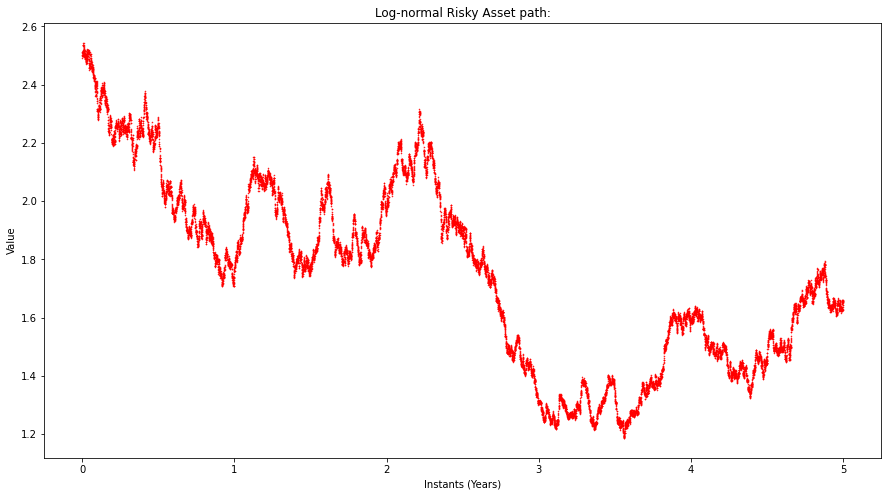

In [6]:
S = Gbm(S_0, mu, sigma, rebalacing_instants)
plot('Log-normal Risky Asset path:', S, dt, 'red', 'Log-normal Risky Asset path')

#### Simulating the *floor's* evolution, over the chosen period

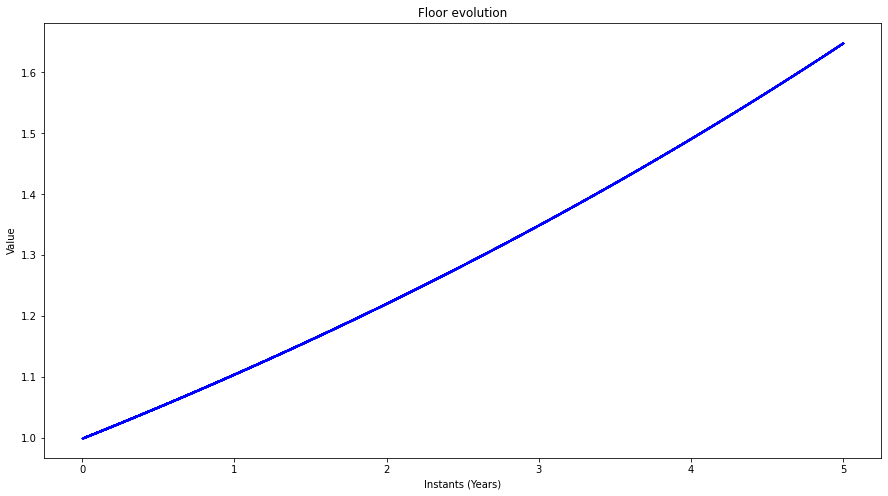

In [7]:
F = Rls(r, F_0, rebalacing_instants)
plot('Floor evolution', F, dt, 'blue', 'Floor')

#### Determining the CPPI portfolio real value, over the simulated Geometric Brownian Motion path

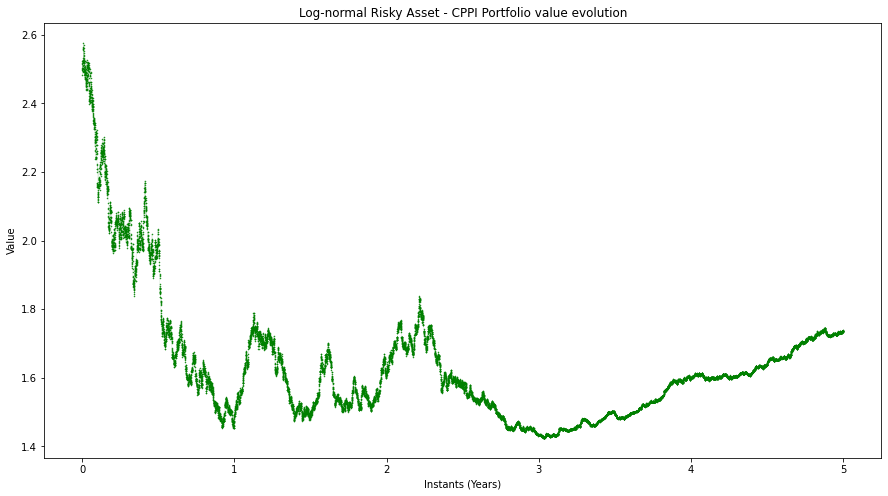

In [8]:
V = Pv(m, rebalacing_instants, S, V_0, F_0, r)
plot('Log-normal Risky Asset - CPPI Portfolio value evolution', V, dt, 'green', 'Portfolio Value')

#### Comparison between the *Risky Asset*, the *CPPI portfolio* and the *floor*, over the simulated Geometric Brownian Motion path

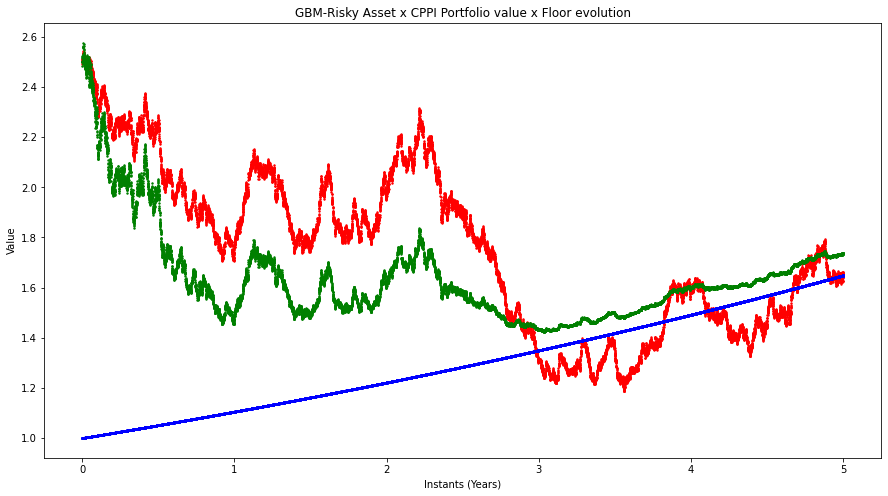

In [9]:
# Plotting Graph Risky Asset x Portfolio value with floor
plot_superimpose('Log-normal Risky Asset x CPPI Portfolio value x Floor evolution', 'Log-normal Risky Asset x Portfolio value x Floor', S , V, F, dt)

#### Detemining the values of the *CPPI portfolio* calculated by the  *Equation 9*, over the simulated path

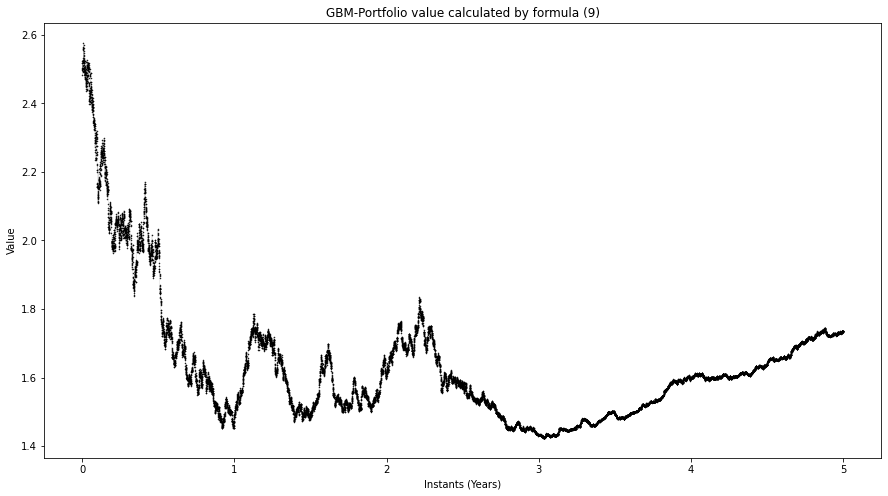

In [10]:
GFV = GFpv(m, rebalacing_instants, S, V_0, F_0, r, sigma)
plot('Log-normal Risky asset - CPPI Portfolio value calculated by formula (9)', GFV, dt, 'black', 'Formula(9)- Log-normal Risky asset - Portfolio Value')

#### Analyzing the difference between the real values and the values provided by Equation 9

We propose an analysis of the difference between the two results: 

The simulations above show two sets of values of a CPPI portfolio over a single simulated path. Moreover, we should note those sets can be seen as vectors with dimensions corresponding to the number of rebalancing dates. For each rebalancing date, we calculate a value for the CPPI portfolio, which becomes an entry of the vector.

In this context, a natural way to analyze how close the set of values calculated by Equation 9 is from the set of real values is to use a distance or even a dissimilarity function.

For this purpose, let $f$ be the vector containing the real values of the CPPI portfolion and $g$ the one contained the formula-generated values. We consider analysing two types of "distances":

(1) $||g - f||_{\ell_2}$, which is actually an euclidean distance, over a space with dimension equals the number of rebalancing dates. 

(2) We define a vector $h$ such that: its i-th entry $h_i := \frac{|g_i - f_i|}{f_i}$, then we take $||h||_{\ell_{\infty}}$

These procedures show how to evaluate differences between the two results for a single path. However, we propose to apply this reasoning for a large number of paths and then, observe the statistics obtained from the large sample. Thus, we proceed by simulate several paths, considering always the same dynamics for the assets, with the same CPPI parameters.   

In [11]:
#Number of paths
Samples_size = 100

In [12]:
#Number of times the portfolio is rebalanced per day
rebalancings_per_day = 1

# Code parameters
dt = 1/(365*rebalancings_per_day)
size = int(years/dt) + 1
rebalacing_instants = np.array(range(0,size))*dt

##### Sample of distances : $\ell_2$ norm of absolute differences


Euclidean Distance - dim: 1826 - l2 norm of f - g
Number of rebalancing dates: 1826
Mean of Distances Sample: 0.7756656906708495
Standard Deviation of Distances Sample: 0.7971061009936856
Proportion of realisations that have distance from the mean greater than the standard deviation: 0.15


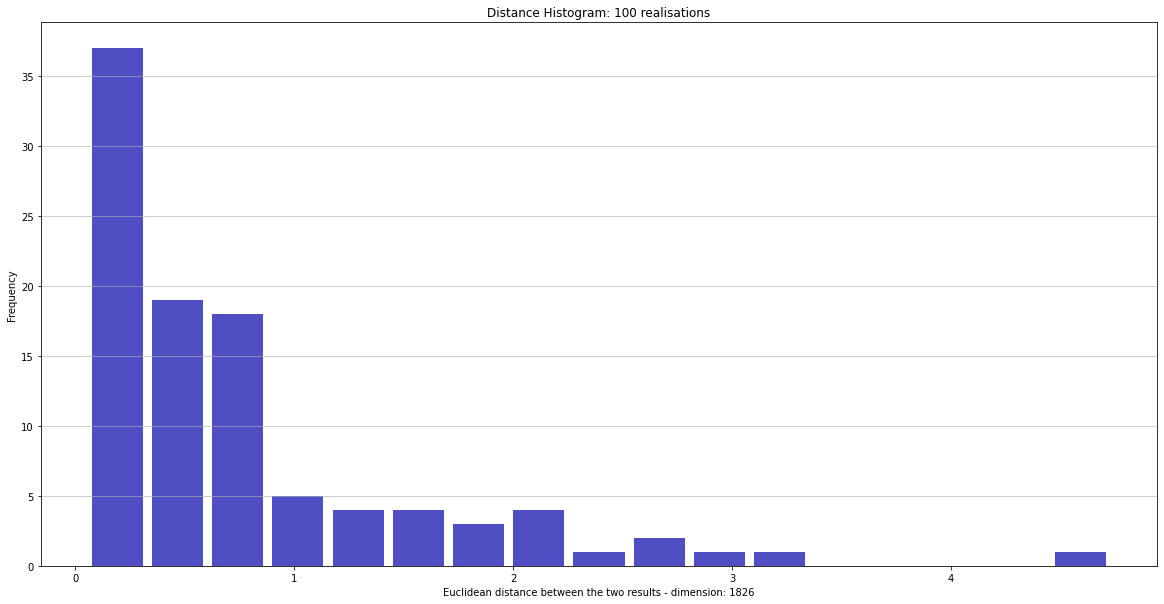

In [13]:
l2_Sample1 = DGSample(Samples_size, m, rebalacing_instants, S_0, V_0, F_0, r, mu, sigma, 'l2')
DStats(l2_Sample1, size, 'l2', 'Sample of Distances - l2')

**Interpretation**:
In order to interpret these informations and to infere about the quality of the results provided by Equation 9 one should considerate a few points:

(1) We are considering euclidean distances in **high dimensional spaces**, thus ordinary numerical values of euclidean distances tend to become high as the dimension grows.

(2) How far is the mean from 0? Is this a considerable value, given the dimension of the space?

(3) How spread is the sample? Is the standard deviation a considerable value, given the dimension of the space?

(4) What proportion of the sample is contrated in the ball $B(mean, stdev)$?

##### Sample of distances: $\ell_{\infty}$ norm of relative differences


Supremum norm of relative differences: linf norm of h
Number of rebalancing dates: 1826
Mean of Distances Sample: 0.010216355682680684
Standard Deviation of Distances Sample: 0.005671136261642228
Proportion of realisations that have distance from the mean greater than the standard deviation: 0.18


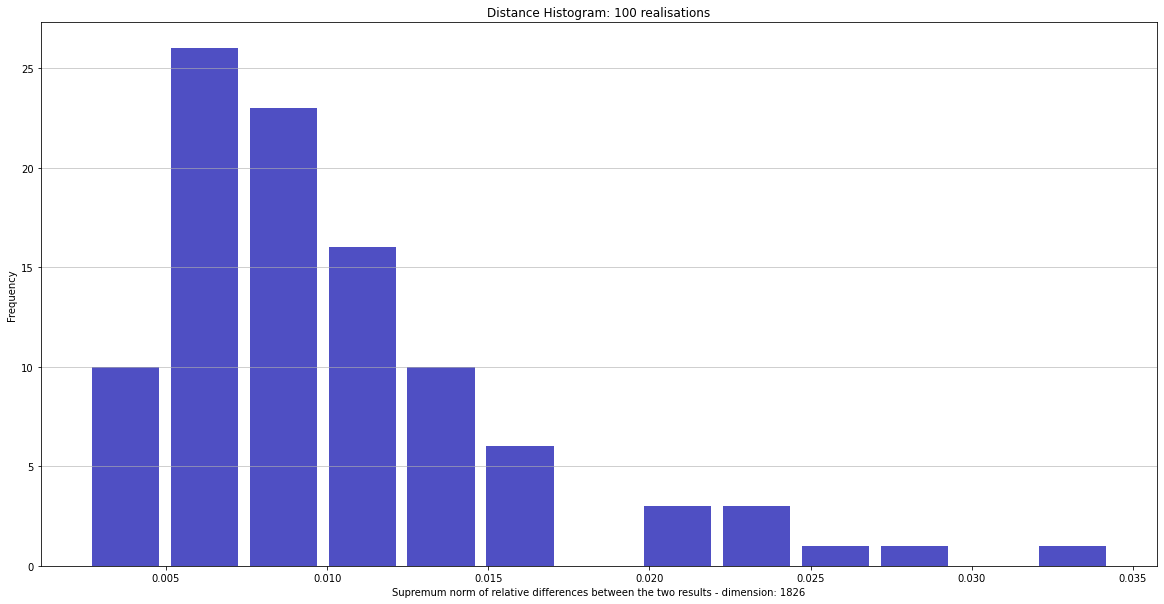

In [14]:
linf_Sample1 = DGSample(Samples_size, m, rebalacing_instants, S_0, V_0, F_0, r, mu, sigma, 'linf')
DStats(linf_Sample1, size, 'linf', 'Sample of Distances - linf')

**Interpretation**:
To interpret this information and to infer about the quality of the results provided by Equation 9 one should considerate a few points:

(1) The dimension of the space no longer plays a crucial role in the analysis, in fact, the numerical values are much more intuitive:

For example, if one sample has a mean of 0.020 and a standard deviation of 0.010 and a proportion of 0.3 of the realizations out of the ball $B(mean, stdev), we can interpret: 

"On average, for all simulated paths, a portfolio that values 100 dollars at some instant, is supposed to be miscalculated by Equation 9, **at most**, by 2 dollars. In 70% of all simulated paths, it was actually miscalculated by Equation 9, **at most**, by a corresponding value between 1 and 3 dollars."

(2) How far is the mean from 0? Is this a considerable value, given it tells the average of the **grossest miscalculations**?

(3) How spread is the sample? Is the standard deviation a considerable value, given it tells the average of how far the **grossest miscalculations** get from their mean?

(4) What proportion of the sample is contracted in the ball $B(mean, stdev)$?

### 2) *Risky asset's* returns following Heston's dynamics

**Introduction to the Heston Model:**

In particular, when one develops models for risky assets, a desirable property for these models to present is: To be subject to calibration, by currently available information on the market.

For example, when one tries to model a stock's evolution by a Geometric Brownian Motion, one is immediately brought to the problem of choosing well-suited parameters $\mu$ and $\sigma$. For many possible applications of such a model, the parameter $\mu$ doesn't have a huge role, once it can be incorporated by the price of the stock, this is the case of the equation 9, and it's also in the context of Black Scholes options pricing. Those two applications, show, however that the parameter $\sigma$, is, in fact, very important to determine the results.

One could first try looking at liquidly traded options of the considered stock. In theory, if the stock could be effectively modeled by a Geometric Brownian Motion, the current options prices would be useful indicators of the parameter $\sigma$ attributed by the market.

In fact, this approach doesn't work. The well-known phenomenon of Volatility Smile/Skew is more than evidence that Geometric Brownian Motion models are not usually subject to calibration, by currently available information on the market. As an attempt to develop models more suited to this issue, we usually considered stochastic volatility models, such as the Heston Model.

**Dynamics of the Heston Model:**

We now explore a conxtext in which the *risky asset's* returns follow the dynamics of a Heston Model. 

More general than a Geometric Brownian motion, now, the *risky asset* is supposed to follow a diffusion process, respecting the general form of equation 2.0:  

\begin{equation*}
\ \it{dS_t} = \mu S_t\it{dt} + \sqrt{\nu_t} S_t\it{dW_t^S}
\label{eq:risky_dynamics} \tag{2.0}
\end{equation*}

Where the square of the volatility (stochastic variance) fits equation 2.1.

\begin{equation*}
\ \it{d\nu_t} =  \kappa(\theta - \nu_t) \it{dt} + \xi\sqrt{\nu_t}\it{d}W_t^{\nu}
\label{eq:vol_dynamics} \tag{2.1}
\end{equation*}

where $W_t^S$ and $W_t^{\nu}$ are correlated Wiener processes:

For every t>0, $Cov(W_t^S, W_t^{\nu}) = \rho t$, for some fixed parameter $\rho$, which is usually negative.

The stochastic variance in the Heston Model is a process itself, in particular, a CIR process. In general, a major characteristic of such a process is a "return to mean" property. In this context, the stochastic variance tends to oscillate, in **long term**, around a constant value.

The parameter can be interpreted as follows:
<dl>
  
  <dd>$\mu$ is the expected rate of return of the asset.</dd>
  <dd>$\theta$ is the long-term variance. As t tends to infinity, the expected value of $\nu_t$ tends to $\theta$</dd>
  <dd>$\kappa$ is the rate or "speed" at which $\nu_t$ reverts to $\theta$</dd>
  <dd>$\xi$ is the volatility of the volatility and determines the variance of $\nu_t$</dd>
</dl>

In fact, if the parameters obey the condition: $2\kappa\theta > \xi^2$, then $\nu_t$ is always strictly positive, as one could expect for a variance.

**Simulations of Stochastic Variances and Risky Asset prices paths following the Heston Dynamics:**

Oppositely to the Geometric Brownian Motion case, when dealing with a process following a Heston dynamics, one does not have closed formulas giving the exact distribution of the increments. Thus, simulating paths for such processes are not straightforward. Our implementation of a *risky asset* following a Heston Model is based on very good approximations for this problem, presented in the article: *A Fast and Exact Simulation for CIR Process, by Anqi Shao* 

#### *Risky asset's* and Stochastic Variance parameters

In [15]:
#Drift
mu = 0.08

#Long term variance
theta = 0.04

#Volatility of volatility
xi = 0.3

#Correlation between Brownian Motions
rho = -0.3

#Returning to the mean speed
kappa = 1

#Initial variance
var_0 = 0.04

#Initial value of the risky assets
S_0 = 2.5

In [16]:
#Number of times the portfolio is rebalanced per day
rebalancings_per_day = 10

# Code parameters
dt = 1/(365*rebalancings_per_day)
size = int(years/dt) + 1
rebalacing_instants = np.array(range(0,size))*dt

#### Simulating a Heston  path of variances over the chosen period

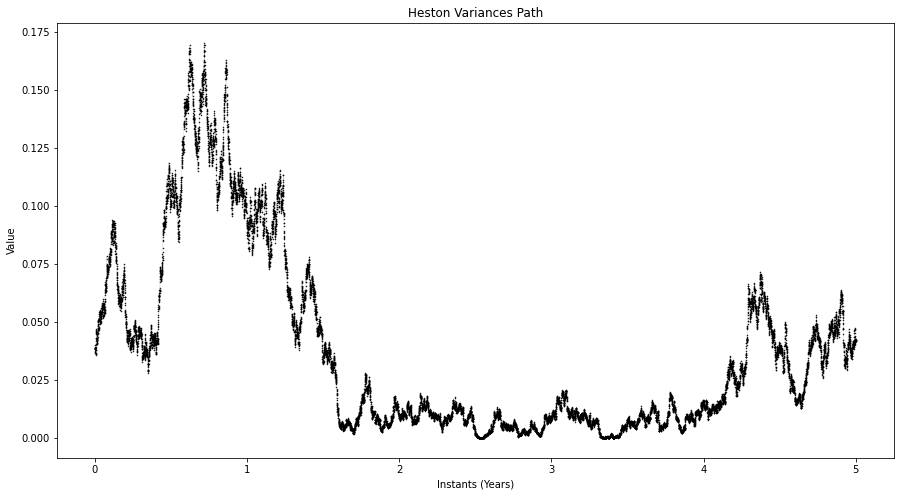

In [17]:
var = Heston_var(rebalacing_instants, var_0, kappa, theta, xi, rho)
plot('Heston Variances Path', var, dt, 'black', 'Heston Variances Path')

#### Simulating a Heston path of *risky asset's* returns over the chosen period

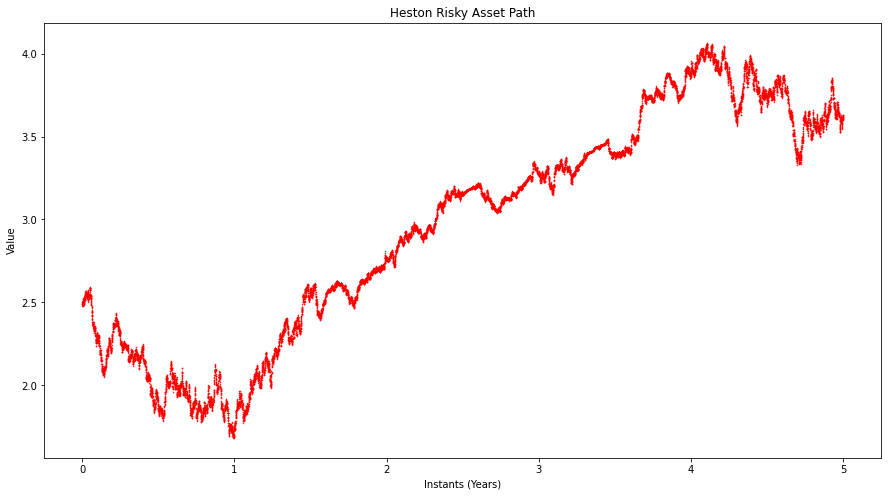

In [18]:
X = Heston_X(mu, rebalacing_instants, var, S_0, kappa, theta, xi, rho, 0.5, 0.5)
plot('Heston Risky Asset Path', X, dt, 'red', 'Heston risky path')

#### Simulating the *floor's* evolution over the chosen period

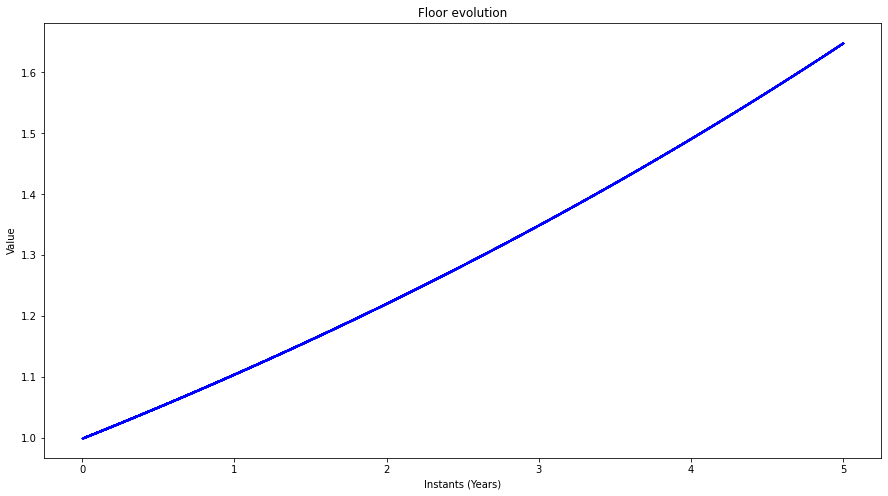

In [19]:
F = Rls(r, F_0, rebalacing_instants)
plot('Floor evolution', F, dt, 'blue', 'Floor')

#### Determining the CPPI portfolio real value over the simulated Heston path

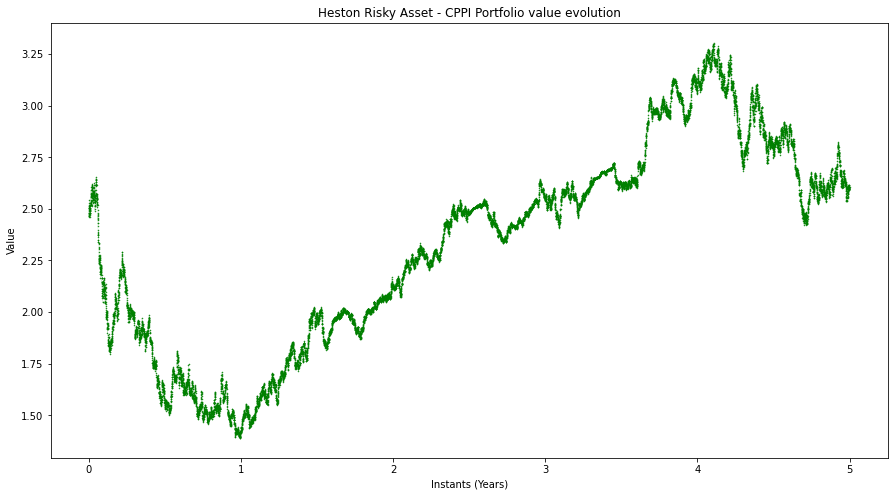

In [20]:
HV = Pv(m, rebalacing_instants, X, V_0, F_0, r)
plot('Heston Risky Asset - CPPI Portfolio value evolution', HV, dt, 'green', 'Heston - CPPI Portfolio Value')

#### Comparison between the *Risky Asset*, the *CPPI portfolio* and the *floor*, over the simulated Heston path

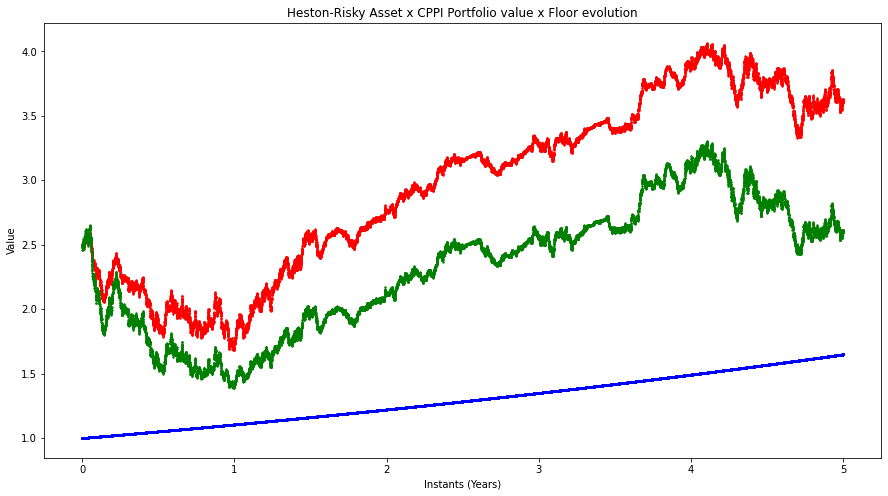

In [21]:
# Plotting Graph  Portfolio value with floor
plot_superimpose('Heston-Risky Asset x CPPI Portfolio value x Floor evolution', 'Heston-Risky Asset x Portfolio value x Floor', X , HV, F, dt)

#### Detemining the values of the *CPPI portfolio* calculated by the *Equation 9* over the Heston simulated path

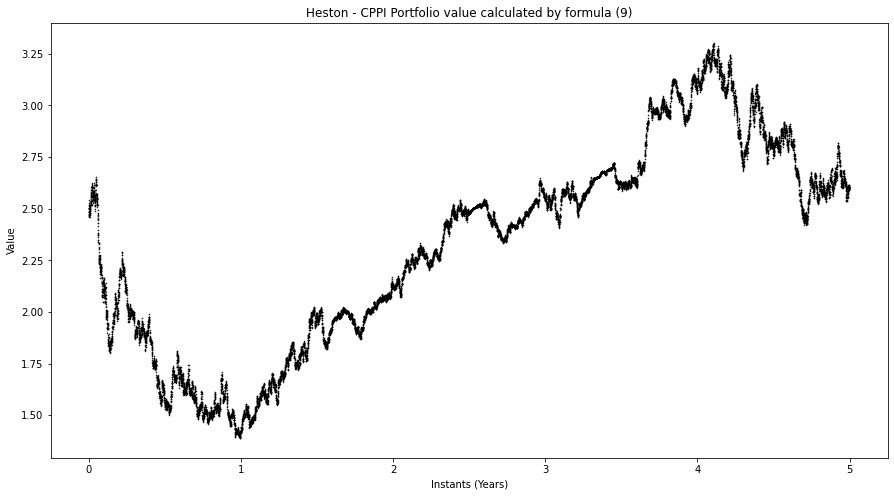

In [22]:
HFV = HFpv(m, rebalacing_instants, X, var, V_0, F_0, r)
plot('Heston - CPPI Portfolio value calculated by formula (9)', HFV, dt, 'black', 'Formula(9)-Heston-Portfolio Value')

#### Analyzing the difference between the real values and the values provided by Equation 9

In [23]:
#Number of paths
Samples_size = 100

In [24]:
#Number of times the portfolio is rebalanced per day
rebalancings_per_day = 1

# Code parameters
dt = 1/(365*rebalancings_per_day)
size = int(years/dt) + 1
rebalacing_instants = np.array(range(0,size))*dt

##### Sample of distances : $\ell_2$ norm of absolute differences


Euclidean Distance - dim: 1826 - l2 norm of f - g
Number of rebalancing dates: 1826
Mean of Distances Sample: 1.0952140102458208
Standard Deviation of Distances Sample: 1.5379740415904863
Proportion of realisations that have distance from the mean greater than the standard deviation: 0.08


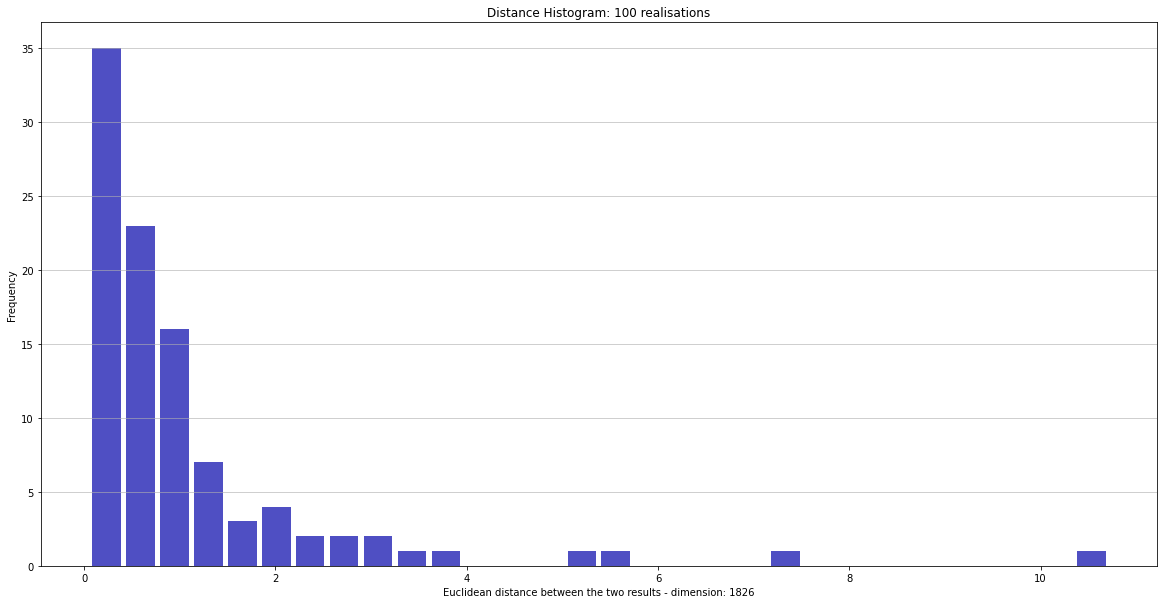

In [25]:
l2_SampleH = DGHSample(Samples_size, m, rebalacing_instants, S_0, V_0, F_0, var_0, r, kappa, theta, xi, rho, 'l2')
DStats(l2_SampleH, size, 'l2', 'Sample of Distances - l2')

##### Sample of distances: $\ell_{\infty}$ norm of relative differences


Supremum norm of relative differences: linf norm of h
Number of rebalancing dates: 1826
Mean of Distances Sample: 0.014913565483726922
Standard Deviation of Distances Sample: 0.010208531195824655
Proportion of realisations that have distance from the mean greater than the standard deviation: 0.23


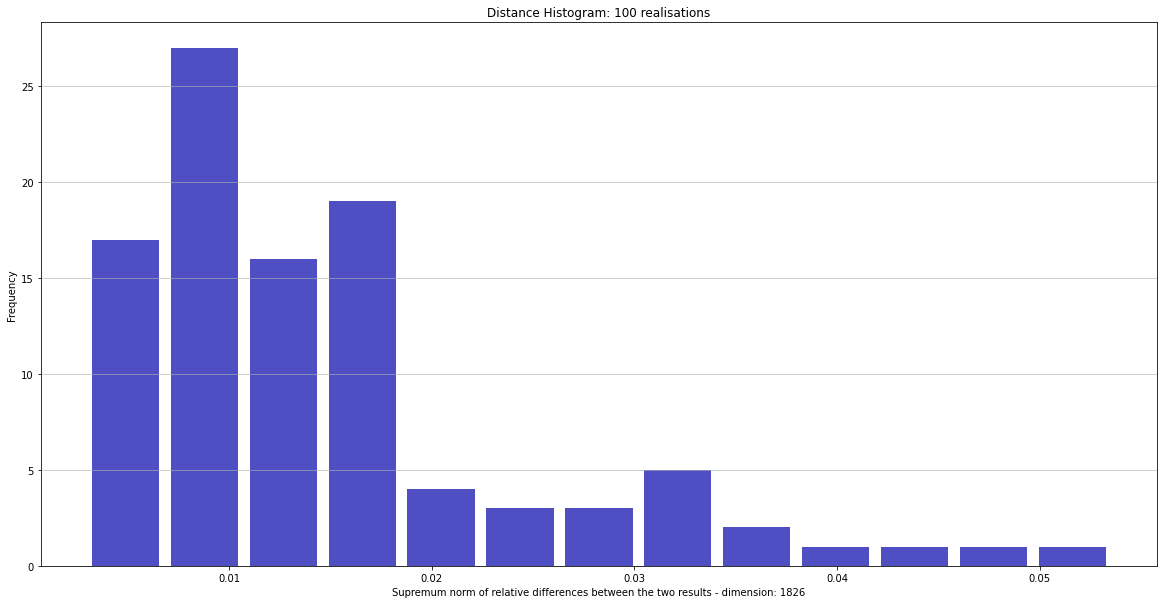

In [26]:
linf_SampleH = DGHSample(Samples_size, m, rebalacing_instants, S_0, V_0, F_0, var_0, r, kappa, theta, xi, rho, 'linf')
DStats(linf_SampleH, size, 'linf', 'Sample of Distances - linf')

# Conclusion